In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler

## Dataset

In [2]:
df_3m = pd.read_csv('datasets/btc_3m.csv')
df_3m

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13666.11,13680.00,6.303815
1,2018-01-01 05:33:00,13679.98,13679.98,13554.44,13568.00,33.709206
2,2018-01-01 05:36:00,13568.00,13575.00,13501.01,13575.00,29.645987
3,2018-01-01 05:39:00,13539.99,13575.00,13400.01,13515.26,30.696039
4,2018-01-01 05:42:00,13515.26,13568.66,13473.47,13556.15,23.260966
...,...,...,...,...,...,...
713012,2022-01-31 05:18:00,37919.05,37919.05,37876.94,37891.30,30.717900
713013,2022-01-31 05:21:00,37891.30,37946.56,37870.00,37918.80,28.369420
713014,2022-01-31 05:24:00,37918.79,37948.79,37888.88,37898.01,22.346010
713015,2022-01-31 05:27:00,37898.02,37945.25,37870.00,37881.76,42.838730


In [3]:
datetime_column = 'datetime'

# Extract datetime column and store it in a separate dataframe
datetime_df = df_3m[datetime_column]

# Drop the datetime column from the original dataframe
df = df_3m.drop(columns=[datetime_column])

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform all remaining columns
df_3m = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Add the datetime column back to the normalized dataframe
df_3m[datetime_column] = datetime_df

df_3m.head()

,open,high,low,close,volume,datetime
0,0.160893,0.160261,0.160568,0.160323,0.001144,2018-01-01 05:30:00
1,0.160349,0.159719,0.158861,0.158616,0.006120,2018-01-01 05:33:00
2,0.158642,0.158124,0.158045,0.158722,0.005382,2018-01-01 05:36:00
3,0.158215,0.158124,0.156502,0.157812,0.005573,2018-01-01 05:39:00
4,0.157838,0.158028,0.157624,0.158435,0.004223,2018-01-01 05:42:00


In [4]:
# Calculating RSI

# Calculate daily price changes
df_3m['delta'] = df_3m['close'].diff()

# Define the window for calculating average gain and average loss
n = 14  # You may adjust this based on your preferences

# Calculate gains (positive changes) and losses (negative changes)
gains = df_3m['delta'].apply(lambda x: x if x > 0 else 0)
losses = -df_3m['delta'].apply(lambda x: x if x < 0 else 0)

# Calculate average gains and average losses over the specified window
avg_gain = gains.rolling(window=n, min_periods=1).mean()
avg_loss = losses.rolling(window=n, min_periods=1).mean()

# Calculate relative strength (RS)
rs = avg_gain / avg_loss

# Calculate RSI
df_3m['rsi'] = 100 - (100 / (1 + rs))

# Drop the 'delta' column as it was used for intermediate calculations
df_3m = df_3m.drop('delta', axis=1)

# Adding change in close price
df_3m['close_Change'] = df_3m['close'].shift(-1) - df_3m['close']

# Drop rows with NaN values created by shifting
df_3m.dropna(inplace=True)

# Define the time window size
time_window = 14  # You can adjust this based on your preference

# Create time windows
for i in range(1, time_window + 1):
    for col in ['open', 'high', 'low', 'close', 'volume', 'rsi', 'close_Change']:
        df_3m[f'{col}_lag_{i}'] = df_3m[col].shift(i)

# Drop rows with NaN values introduced by the lag
df_3m.dropna(inplace=True)



# Display the DataFrame
print(df_3m.shape)
df_3m.head()

C:\Users\sanya\AppData\Local\Temp\ipykernel_760\603676980.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_3m[f'{col}_lag_{i}'] = df_3m[col].shift(i)
C:\Users\sanya\AppData\Local\Temp\ipykernel_760\603676980.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_3m[f'{col}_lag_{i}'] = df_3m[col].shift(i)


(712976, 106)


,open,high,low,close,volume,datetime,rsi,close_Change,open_lag_1,high_lag_1,...,volume_lag_13,rsi_lag_13,close_Change_lag_13,open_lag_14,high_lag_14,low_lag_14,close_lag_14,volume_lag_14,rsi_lag_14,close_Change_lag_14
15,0.157524,0.157758,0.157266,0.158355,0.006298,2018-01-01 06:15:00,48.182571,-0.000242,0.157585,0.156964,...,0.005382,5.882353,-9.106055e-04,0.160349,0.159719,0.158861,0.158616,0.006120,0.000000,1.066997e-04
16,0.158296,0.159884,0.158356,0.158113,0.005541,2018-01-01 06:18:00,45.834548,0.000201,0.157524,0.157758,...,0.005573,3.916303,6.232785e-04,0.158642,0.158124,0.158045,0.158722,0.005382,5.882353,-9.106055e-04
17,0.158747,0.158561,0.158518,0.158314,0.004329,2018-01-01 06:21:00,53.798432,-0.000582,0.158296,0.159884,...,0.004223,21.804854,-1.769995e-03,0.158215,0.158124,0.156502,0.157812,0.005573,3.916303,6.232785e-04
18,0.158340,0.158271,0.158029,0.157732,0.003940,2018-01-01 06:24:00,44.645053,0.000290,0.158747,0.158561,...,0.003560,14.263589,-3.048562e-07,0.157838,0.158028,0.157624,0.158435,0.004223,21.804854,-1.769995e-03
19,0.158047,0.158110,0.157305,0.158021,0.005615,2018-01-01 06:27:00,63.328340,0.000030,0.158340,0.158271,...,0.003803,14.262739,0.000000e+00,0.158120,0.157710,0.156533,0.156665,0.003560,14.263589,-3.048562e-07


In [5]:
# Getting a shorter training set of 3 months

# Set the date range
start_date = '2018-01-01 05:30:00'
end_date = '2018-04-01 05:30:00'

# Filter the data
filtered_df_3m = df_3m[(df_3m['datetime'] >= start_date) & (df_3m['datetime'] <= end_date)]
print(filtered_df_3m.shape)
filtered_df_3m.tail()

(42460, 106)


,open,high,low,close,volume,datetime,rsi,close_Change,open_lag_1,high_lag_1,...,volume_lag_13,rsi_lag_13,close_Change_lag_13,open_lag_14,high_lag_14,low_lag_14,close_lag_14,volume_lag_14,rsi_lag_14,close_Change_lag_14
42470,0.057294,0.057038,0.057338,0.057281,0.002747,2018-04-01 05:18:00,36.737401,0.000149,0.057479,0.057312,...,0.009868,47.236820,-0.000015,0.058119,0.057843,0.057993,0.057891,0.005409,57.820964,-0.000609
42471,0.057311,0.057190,0.057502,0.057430,0.004319,2018-04-01 05:21:00,54.038143,-0.000027,0.057294,0.057038,...,0.004154,45.173218,-0.000109,0.057883,0.057646,0.057486,0.057282,0.009868,47.236820,-0.000015
42472,0.057460,0.057190,0.057532,0.057403,0.002003,2018-04-01 05:24:00,53.690888,-0.000062,0.057311,0.057190,...,0.014804,37.720301,-0.000303,0.057463,0.057190,0.057486,0.057267,0.004154,45.173218,-0.000109
42473,0.057433,0.057160,0.057532,0.057341,0.003178,2018-04-01 05:27:00,55.088757,0.001099,0.057460,0.057190,...,0.011096,24.662719,0.000289,0.057346,0.057095,0.057158,0.057157,0.014804,37.720301,-0.000303
42474,0.057342,0.058193,0.057532,0.058440,0.019235,2018-04-01 05:30:00,80.494957,-0.000137,0.057433,0.057160,...,0.017611,33.762021,0.000062,0.057227,0.057012,0.057021,0.056855,0.011096,24.662719,0.000289


### Input and output features

In [6]:
split_ratio = 0.8
split_index = int(split_ratio * len(filtered_df_3m))

train_data = filtered_df_3m[:split_index]
test_data = filtered_df_3m[split_index:]

In [7]:
# Prepare the input features and target variable
dates_train = train_data['datetime']
X_train = train_data.drop(['datetime','close_Change'], axis=1).values
y_train = train_data['close_Change'].values

X_test = test_data.drop(['datetime','close_Change'], axis=1).values
y_test = test_data['close_Change'].values

# Reshape input features for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


## Model

In [8]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.activations import leaky_relu
from keras.layers import Dense, LSTM, Dropout

In [9]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]),activation='tanh',recurrent_activation="sigmoid"))
model.add(Dropout(0.2))
model.add(LSTM(units=64,return_sequences=True,activation='tanh',recurrent_activation="sigmoid"))
model.add(Dropout(0.2))
model.add(LSTM(units=64,activation='tanh',recurrent_activation="sigmoid"))
model.add(Dropout(0.2))
# model.add(Dense(32,activation="leaky_relu"))
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_absolute_percentage_error',
              optimizer=Adam(),
              metrics=['mean_absolute_percentage_error','mean_squared_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             43264     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [10]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
850/850 [==============================] - 34s 26ms/step - loss: 57240.1914 - mean_absolute_percentage_error: 57240.1914 - mean_squared_error: 6.1056e-05 - val_loss: 86102.7188 - val_mean_absolute_percentage_error: 86102.7188 - val_mean_squared_error: 3.5869e-05
Epoch 2/100
850/850 [==============================] - 22s 26ms/step - loss: 28467.8867 - mean_absolute_percentage_error: 28467.8867 - mean_squared_error: 1.6221e-05 - val_loss: 22094.8945 - val_mean_absolute_percentage_error: 22094.8945 - val_mean_squared_error: 2.5884e-06
Epoch 3/100
850/850 [==============================] - 22s 26ms/step - loss: 19261.6094 - mean_absolute_percentage_error: 19261.6094 - mean_squared_error: 7.6044e-06 - val_loss: 39893.3359 - val_mean_absolute_percentage_error: 39893.3359 - val_mean_squared_error: 7.8367e-06
Epoch 4/100
850/850 [==============================] - 17s 21ms/step - loss: 14254.0430 - mean_absolute_percentage_error: 14254.0430 - mean_squared_error: 4.6308e-06 - val_los

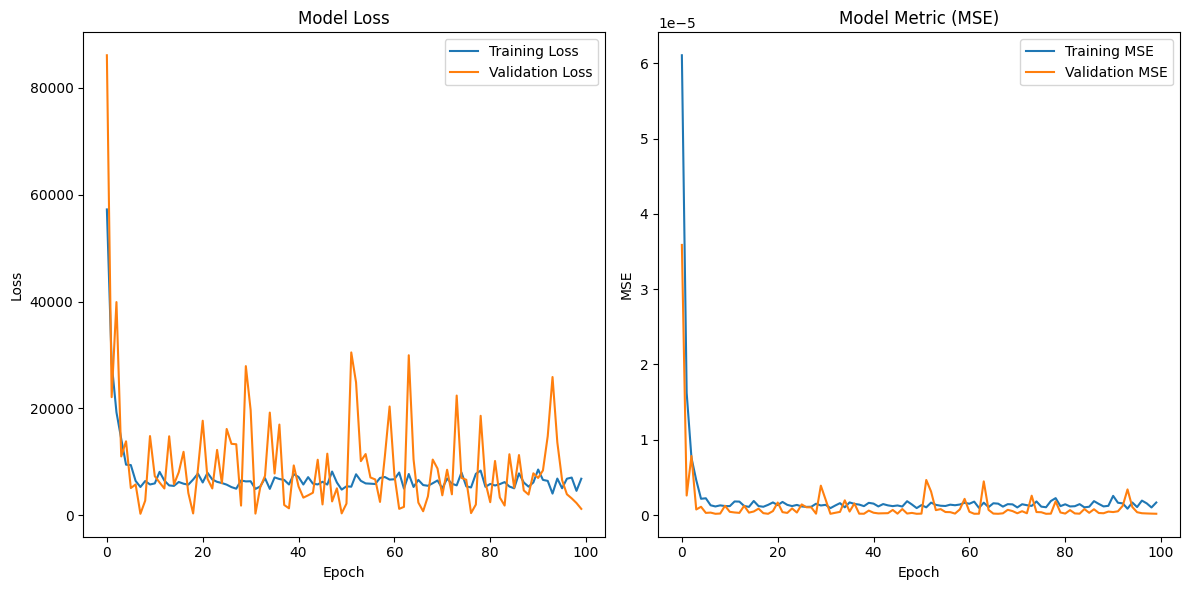

In [11]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation metrics (e.g., Mean Squared Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Metric (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
model.save(f"BTC_LSTM_{datetime.datetime.timestamp(datetime.datetime.now())}.h5")

In [13]:
from keras.models import load_model
model = load_model('BTC_LSTM_1704639611.168454.h5')

In [14]:
train_predictions = model.predict(X_train).flatten()
train_predictions

1062/1062 [==============================] - 4s 3ms/step


array([0.00301032, 0.00301038, 0.00301036, ..., 0.00300962, 0.00300977,
       0.00301035], dtype=float32)

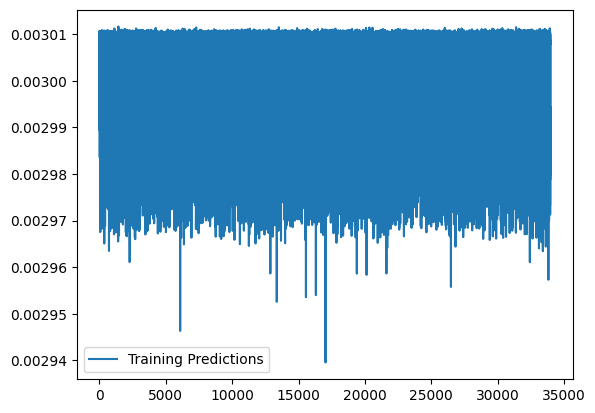

In [15]:
plt.plot( train_predictions)
plt.legend(['Training Predictions'])

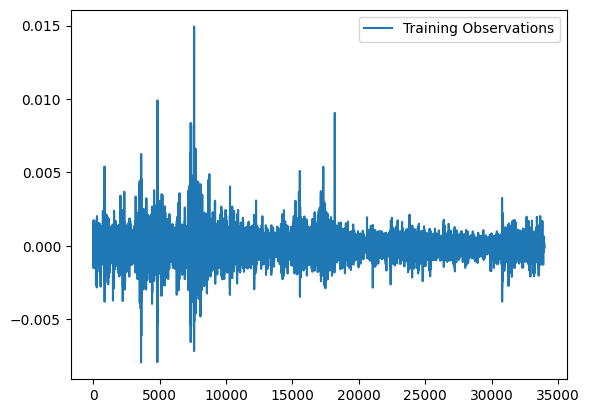

In [16]:
plt.plot( y_train)
plt.legend(['Training Observations'])

266/266 [==============================] - 1s 3ms/step


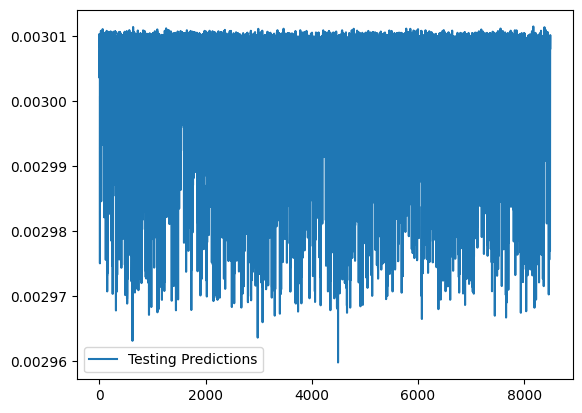

In [17]:
test_predictions = model.predict(X_test).flatten()

plt.plot(test_predictions)
plt.legend(['Testing Predictions'])

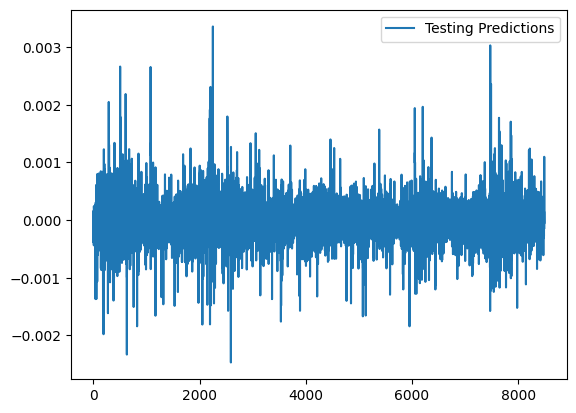

In [18]:
plt.plot(y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

## Trade simulation

In [6]:
features = ["open"	,"high",	"low" ,"volume" , "rsi"]

In [25]:
balance_usdt = 10000
balance_btc = 0
stop_loss = balance_btc*(0.002)

for i in range(df_3m.shape[0]):
    
    # get the date for the i th row
    date = df_3m.iloc[i]['datetime']

    # Get the data for the date
    data = df_3m[df_3m['datetime'] == date]

    # Get the feature vector for the date
    x = data.drop(columns=['datetime','close_Change'])
    print(x.as_numpy())
    # Predict the price using the model
    y_pred = model.predict(x)

    # difference between the predicted close and actual open
    open=data["open"].values[0]
    close_predicted=y_pred[0]
    diff = close_predicted-open

    # Compare the predicted class with the actual class
    if diff > 0 and balance_usdt>0:
        btc=(balance_usdt-0.0015*balance_usdt)/open
        stop_loss = balance_usdt*(0.002)
        balance_btc=btc
        balance_usdt=0
        print(f'{date} -> : usdt : {balance_usdt}   btc : {balance_btc}   [buying]')

    elif diff<0 and diff < (-stop_loss) and balance_btc>0:  # Changed this line
        usdt=balance_btc*open
        balance_usdt=usdt-(0.0015*usdt)
        balance_btc=0
        print(f'{date} -> : usdt : {balance_usdt}   btc : {balance_btc}   [selling]')
    else:
        print(f'{date} -> : usdt : {balance_usdt}   btc : {balance_btc}   [holding]')

    #if loop reached the end convert all btc to usd
    if i==df.shape[0]-1 and balance_usdt==0:
        usdt=balance_btc*open
        balance_usdt=usdt
        balance_btc=0
    #print the balance and btc
    
# Print the final balances after executing the trades
print(f"Final Balances: USDT {balance_usdt}, BTC {balance_btc}")

AttributeError: 'DataFrame' object has no attribute 'as_numpy'